# **A Brief History of Neural Networks**

Recommended [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:
````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

First, a few fun discussion questions. 

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# If you could make an atom-for-atom copy of a brain, would it **think**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# If you could make an neuron-for-neuron copy of a brain...would it **think**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# Is it possible to model the way our brains work using **mathematics**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

# Do you think an algorithm will ever be **conscious** in the way a human is?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

---

- These are all fun questions to ponder over a few beers, but are another thing entirely to address with scientific rigor. 
- In the 1940s, Warren McCulloch and Walter Pitts, inspired by Russel and Whitehead's Pricipia Mathematica, published [A LOGICAL CALCULUS OF THE IDEAS IMMANENT IN NERVOUS ACTIVITY](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf) - an effort to model the brain in terms of collections of simple mathematics models of neurons. 

![](../graphics/mcculloch_and_pitts-01.png)

- "Pitts and Mculloch were able to draw striking paralles between the computing powers of both artificial neural networks and Turing machines." [Reference 1] This later turned out not to be entirely true - see reference for more details.
- Lets look at the mathematical model of the nueron introduced by McCulloch and Pitts:

![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$



![](../graphics/spacer_small.png)

where $\mathbf{w}$ is a vector of real-valued weights, $\mathbf{w} \cdot \mathbf{x}$ is the dot product $\sum_{i=1}^m w_i x_i$, where $m$ is the number of inputs and $b$ is the ''bias''.

![](../graphics/spacer_small.png)

![](../graphics/NNQ1-01.png)

---

![](../graphics/mcculloch_pitts_nueron-01.png)

- Here's a common way to represent Mculloch-Pitts Nueron Models. 
- It's worth spending some time making sure we understand how these guys work, becuase remarkable, cutting-edge neural networks today use **very similar** models of neurons.

---

- Maybe we'll do these in desk clumps and put answers on the whiteboards:

![](../graphics/NNQ2-01.png)

---

![](../graphics/NNQ3-01.png)

---

- So, McCulloch and Pitts showed that sets of these nueron models connected in various ways could perform various complex operations.
- They did not, however, posit an explanation for **how brains learn.**
- Six years after McCulloch and Pitts published [A LOGICAL CALCULUS OF THE IDEAS IMMANENT IN NERVOUS ACTIVITY](http://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf), Donold O. Hebb suggested how these models could learn. [Ref 1 and 3]
- Hebb proposed that the weights of connections between our neurons change as we learn - specifically that the conductivity of brain synapses changed over time as it was activated by other neurons. 
- Hebb did not however, propose a method for **programming McCulloch and Pitts's models to learn.**
- That innovation would have to wait another 5-7 years.

![](../graphics/spacer_small.png)

---

![](../graphics/rosenblatt-01.png)

- In the mid 1950s at Cornell's Aeronautical Labratory, Frank Rosenblatt, developed an algorithmic approach to training McCulloch+Pitts style networks. 
- He first implemented his algorithm on an IBM704 computer, and then built a physical machine, **The Perceptron**, to implement his algorithm.
- Let's see how Rosenblatt's algorithm works.

### **The Perceptron Algorithm**

Let's consider the 2 dimensional case, here's some data for us to play with. This example is borrowed from Leslie Valliant's outstanding book, Probably Approximately Correct, pages 44-49.

In [28]:
%pylab inline

#Training Data
X = np.array([[4, 1],
              [1, 2],
              [5, 1],
              [3, 2],
              [5, 2],
              [4, 3]])

Populating the interactive namespace from numpy and matplotlib


In [29]:
#Labels
y = np.array([1, 0, 1, 0, 1, 0])

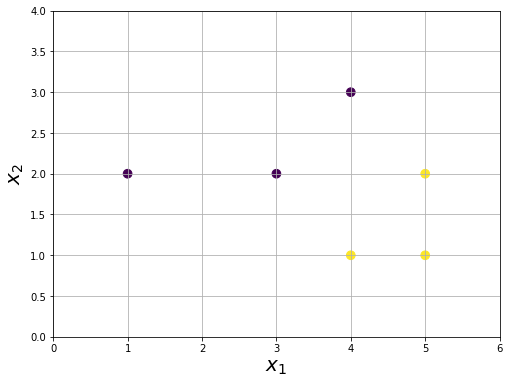

In [30]:
fig = figure(0, (8,6))
scatter(X[:,0], X[:,1], c = y, s = 75)
xlabel('$x_1$', fontsize = 20)
ylabel('$x_2$', fontsize = 20)
xlim([0, 6]); ylim([0, 4])
grid(1)

Now, let's see how Frank Rosenblatt's perceptron machine would learn to classify this data. Remember that our neuron model from McCulloch + Pitts: 



![](../graphics/spacer_small.png)

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$

In our 2 dimensional case this would be:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + b > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- So our goal here then is for $w_1 x_1 + w_2 x_2 + b > 0$ for our positive examples, and $w_1 x_1 + w_2 x_2 + b < 0$ for our negative examples. 
- First, let's make a bit of a variable change. 
- It will be easier to get Rosenblatt's equation working if $b=0$. 
- We can achieve this, without losing any generality, by swapping our 2d problem for a 3d problem, where we append a 1 to each of our examples, like this:

In [32]:
#Careful, just run this once!
X = np.hstack((X, np.ones((X.shape[0], 1))))

In [33]:
X

array([[4., 1., 1.],
       [1., 2., 1.],
       [5., 1., 1.],
       [3., 2., 1.],
       [5., 2., 1.],
       [4., 3., 1.]])

- So, we've appended a 1 to each of our examples, and are now going to try to solve this (equivalent) equation instead:

![](../graphics/spacer_small.png)

$$
f(x_1, x_2) = \begin{cases}1 & \text{if }\ w_1 x_1 + w_2 x_2 + w_3 x_3 > 0\\0 & \text{otherwise}\end{cases}
$$

![](../graphics/spacer_small.png)

- Where $b = w_3$.
- Can you see *why* this equation is equivalent to our original 2-d case?
- From here, the perceptron algorithm is simple! 
- First, let's write a quick method to wrap up our neuron model:



In [69]:
def neuron(x, w):
    '''Simple McCulloch-Pitts Neuron model, x and w and are numpy arrays of the same shape'''
    return np.dot(x, w) > 0

- Next, we'll initialize our model with weights of zero:

In [70]:
w = np.zeros(3)

In [71]:
w

array([0., 0., 0.])

- Then we'll iterate through our examples one at a time:

In [72]:
i = 0
X[i, :]

array([4., 1., 1.])

- For each example, check if our classification is correct:

In [73]:
y[i]

1

In [74]:
neuron(X[i, :], w)

False

- In this case, our classification was incorrect. The idea behind the perceptron algorithm is to update our weights to make our nueron more likely to correctly classify our example next time. The output of $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too small in this case. The Perceptron algorithm tells us to increase the weights by adding the our example values to our weights, like this:

In [75]:
w = w + X[i, :]

In [76]:
w

array([4., 1., 1.])

- Let's move on to our next example: 

In [77]:
i = 1
X[i, :]

array([1., 2., 1.])

In [78]:
y[i]

0

In [79]:
neuron(X[i, :], w)

True

**Wrong again!** But this time $w_1 x_1 + w_2 x_2 + w_3 x_3$ was too large! As you may have guessed, we need to update our weights by subtracting our example values. 

In [80]:
w = w - X[i, :]

In [81]:
w

array([ 3., -1.,  0.])

Let's check out one more example:

In [83]:
i = 2
X[i, :]

array([5., 1., 1.])

In [84]:
y[i]

1

In [85]:
neuron(X[i, :], w)

True

- This one worked! When our neuron is correct, the perceptron algorithm tells us to to leave our weights alone.

and allow $b=0$. We can do this without losing generality by making a slight modification to our data. 

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0\\0 & \text{otherwise}\end{cases}
$$

*"The interesting fact about the perceptron algorithm is that, in spite of our lack of control over its exact fate as we let it loose on arbitrary data, it nonetheless manages to acheive something quite remarkable. The most basic statement of the power of this algorithm, proved by Albert Novikoff soon after the algorithm was first proposed, is that if there is a true linear seperator, then the algrorithm is sure to find it, or another hypothesis that also correctly classifies all the examples, after having made misclassifications only a finite number of times."*
- Leslie Valliant in Probably Approximately Correct, p. 47

*"Learning is achieved in many steps that are plausible but unnocuous when viewed one by one in isolation. These steps work becuase there is an overall algorithmic plan. In combination the steps achieve something, in particular, some kind of convergence."*

- Leslie Valliant in Probably Approximately Correct, p. 49

Ok, so I need to grab PAC from the office, and I'm waiting on the perceptrons book. Broad Strokes: 

1. Let's try out the perceptron rule for ourselves, maybe make a little in-class exercise and an animation.
2. Enjoy some Rosenblatt AI hype
3. When could this fail?
4. Misnky drops the hammer
5. You know, then I would like to cover some Hinton. That would be great! 
6. Yeah, and then end on Alex Net. I'm definitley fuzzy on post 1970s history, so this will be cool!

### References

1. Crevier, Daniel. AI: the tumultuous history of the search for artificial intelligence. Basic Books, 1993. pages 30-32, 102-107.
2. [The Man Who Tried to Redeem the World with Logic](http://nautil.us/issue/21/information/the-man-who-tried-to-redeem-the-world-with-logic). Nautilus.
3. Hebb, Donald Olding. "The first stage of perception: growth of the assembly." The Organization of Behavior. Psychology Press, 2005. 102-120.